<a href="https://colab.research.google.com/github/cedgar86/cogwork-colab/blob/main/cogwork_colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic operations**



---



My job involves running a lot of quantaitive experiments, consisting of repetitive trials that produce lots of separate but structurally identical data in separate files. 

For this reason, I need to know how to load data into programming environments so it can be processed and analysed, and do so efficiently when there are lots of files to read in and collate at once.

I am now going to explore several ways of doing this using data stored in Google drive.

As we are in Google Colab, I want to try and work with Google drive. There may be times when we want to pull data directly from a web address, but often we will want to work with data stored locally, or at least stored in cloud-synched folders.

First up, we need to access my Google Drive, read data, and authenticate the user (me).

In [12]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I can now view files in my Google Drive by selecting 'Files' from the menu on the left hand side of the Colab environment.

Next, we want to change the working directory to a folder in my Google Drive ('colab2'), where I have saved files that I want to use for this project.

In [13]:
%cd "/content/drive/MyDrive/ColabNotebooks/colab2"

/content/drive/MyDrive/ColabNotebooks/colab2


Next, we upload two csv files I want ot work with to my Google drive: cogwork2a and cogwork2b.

In [14]:
from google.colab import files
uploaded = files.upload()

Saving cogwork2a.csv to cogwork2a (1).csv
Saving cogwork2b.csv to cogwork2b (1).csv


Then, we assign each of the files to a dataframes, and print them to quickly inspect their contents. 

Again, we could use a more straightforward version of the read.csv funciton, but this method allows us to wokr with files we have just uploaded using the files.upload() function.

In [19]:
colours_df = pd.read_csv('cogwork2a.csv')
numbers_df = pd.read_csv('cogwork2b.csv')

print(colours_df)
print(numbers_df)

     random_number  colour
0                9     red
1                6   green
2               17    blue
3                2  orange
4               20  yellow
..             ...     ...
97              12   green
98               6    blue
99              20  orange
100              3  yellow
101             19  purple

[102 rows x 2 columns]
   selection_number
0                 1
1                 2
2                 3
3                 4
4                 5


What have we got?

colours_df is a dataframe consisting of two columns: one of random numbers between 1-20, the other one of six colours: red, green, blue, orange, yellow, purple.

numbers_df is a dataframe consisting of 1 column: 'selection_numbers', with five rows containing the numbers 1-5.

I would like to create a new dataframe that contrains only the rows of colours df, in which the random_number matches 1 of the 5 selection numbers in numbers_df's selection_number column.

First we assign the numbers contained within the selection_number column to a list called selection_numbers.

In [20]:
import pandas as pd

selection_numbers = list(numbers_df["selection_number"])

We can then use this list with the .isin function to create a subset of the colours_df using the code below, easy.

In [21]:
colours_subset = colours_df[colours_df['random_number'].isin(selection_numbers)]

print(colours_subset)

     random_number  colour
3                2  orange
11               2  purple
15               4  orange
19               3   green
20               2    blue
23               3  purple
24               5     red
28               2  yellow
29               3  purple
30               1     red
48               1     red
50               3    blue
53               3  purple
58               1  yellow
64               3  yellow
65               1  purple
66               4     red
77               2  purple
80               2    blue
84               5     red
90               5     red
100              3  yellow


Next up, we use a countplot from the seaborn package to plot the frequency of each colour in the dataframe.

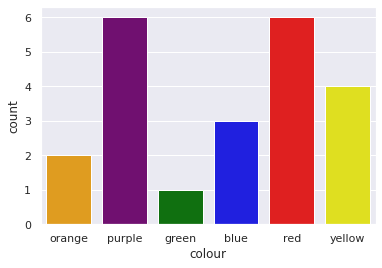

In [33]:
import seaborn as sns
sns.set_theme(style="darkgrid")

colour_count = sns.countplot(x="colour", data=colours_subset, palette=['#FFA500', '#800080', '#008000', '#0000FF', '#FF0000', '#FFFF00'])

Now for something slightly different, processing and collating data across many different files. 

Simulated data files for 10 participants (part1.csv-part10.csv) have been dropped into the colab2 directory. Each files contains a trial column (for trial number) and a response column (the participants response for that trials).

Trial numbers are identical across participants, so we will use the glob function (from the glob package), in combination with a for loop, to loop through each file in the working directory (that contains the string 'part'), extract the responses column, and concactenate it on to a dataframe in which contains each participant's response data. The columns will be labelled with each participant's identifying code.

In [47]:
import glob

fnames = glob.glob("*part*")
col_names = [s.replace(".csv", "") for s in fnames]

responses_df = pd.DataFrame()

for f in fnames:
  part_df = pd.read_csv(f)

  responses_df = pd.concat([responses_df, part_df["response"]], axis=1)

responses_df.columns = col_names

part1_df = part_df = pd.read_csv('part1.csv')

# Following code creates a new trial column.
trials = range(1,51)
responses_df.insert(0,'trial', trials)

print(responses_df)

    trial  part1  part2  part3  part4  ...  part6  part7  part8  part9  part10
0       1     13     26     21     30  ...     22      1     16     30       9
1       2      6     26      2     26  ...     11      5      5      7       2
2       3     19     13      5      6  ...     19     10      5     30      13
3       4      7     20     23      3  ...     24      9     19      2      16
4       5     15      6     21      2  ...      5     25      9     18      29
5       6     20     10     23     10  ...     21     22     13     20      23
6       7     15     28     19     27  ...     13     21     29     21       6
7       8      6     10      7      7  ...     22     21      9     29      27
8       9      1      4     10      3  ...      2     14     17     18      18
9      10     12     27     12     28  ...     27      6     19     30      23
10     11      1      1     28      6  ...      1     16     29     17      24
11     12      4      4     28     29  ...     12   

Finally, we save responses_df to the colab2 folder.

In [ ]:
responses_df.to_csv("responses_combined.csv")